In [1]:
import sys
# Insert base project path here, like:
# sys.path.append("/home/federico/programming/CM/")
sys.path.append("/home/federico/Desktop/University/CM/")

In [2]:
import time
import random
from datetime import datetime as dt

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from src.utils import *
from src.NN.metrics import mean_squared_error
from src.LS.LS import LS
from src.LS.testLS import scaling, generic_test, generate

In [3]:
random.seed(42) # Needed for reproducibility

In [4]:
def plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, mrange, n, save=False):
    
    m = mrange.stop
    
    # --- Plotting QR stats ---
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_qr_a3, "o-", label="mio")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    
    # --- Plotting LS stats ---
    plt.plot(mrange, time_ls_np, "^-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_ls_a3, "o-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

# Scaling test

In [5]:
starting_m = 1000
last_m = 11000
n = 100
step = 1000
repeat = 20
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=11000, t=20
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
1000   || 189.4644 | 189.4644 |   4.0737 |   4.0737 |  42.9384 |  42.9384 |   6.7463 |   6.7463
2000   || 259.0061 |  69.5418 |   6.4457 |   2.3720 |  62.0305 |  19.0921 |   7.9226 |   1.1763
3000   || 321.4580 |  62.4518 |  11.5509 |   5.1052 |  98.3911 |  36.3606 |  10.2058 |   2.2831
4000   || 381.7533 |  60.2954 |  13.0312 |   1.4803 | 140.2733 |  41.8822 |  12.2952 |   2.0894
5000   || 463.2449 |  81.4916 |  16.7383 |   3.7071 | 177.6669 |  37.3936 |  15.5317 |   3.2365
6000   || 506.7082 |  43.4633 |  17.7383 |   1.0001 | 199.1221 |  21.4552 |  16.7402 |   1.2085
7000   || 567.6123 |  60.9042 |  19.8164 |   2.0781 | 235.9584 |  36.8363 |  17.7274 |   0.9871
8000   || 630.2896 |  62.6773 |  24.4377 |   4.6212 | 270.9006 |  34.9421 |  20.5235 |   2.7961
9000   || 686

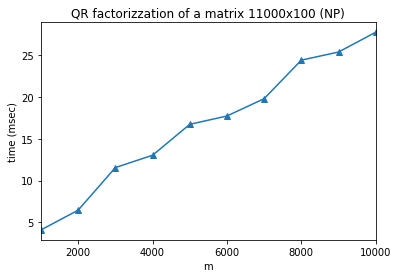

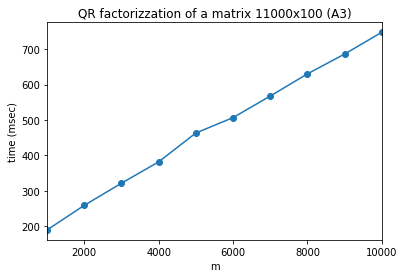

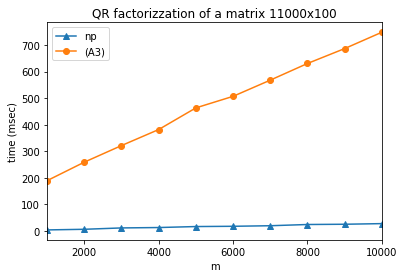

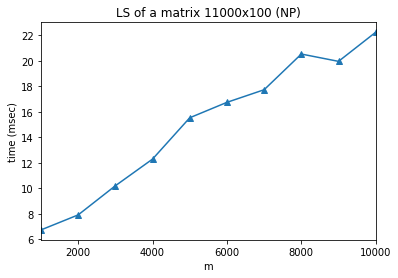

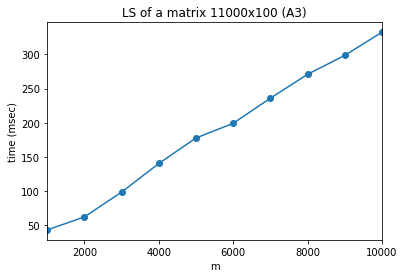

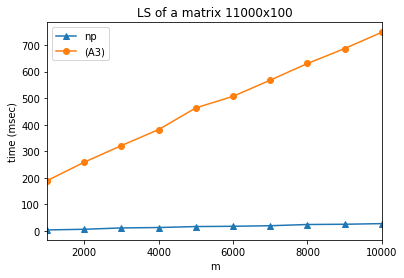

<Figure size 432x288 with 0 Axes>

In [6]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

In [7]:
starting_m = 10000
last_m = 60000
n = 100
step = 10000
repeat = 5
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=60000, t=5
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
10000  || 742.7338 | 742.7338 |  27.1786 |  27.1786 | 329.1576 | 329.1576 |  21.0472 |  21.0472
20000  || 2518.3022 | 1775.5684 | 145.6692 | 118.4906 | 680.0328 | 350.8752 |  81.4884 |  60.4412
30000  || 3650.9482 | 1132.6460 | 336.3586 | 190.6894 | 1040.0600 | 360.0272 | 184.6438 | 103.1554
40000  || 4791.8384 | 1140.8902 | 515.5800 | 179.2214 | 1324.5558 | 284.4958 | 278.1036 |  93.4598
50000  || 6022.2196 | 1230.3812 | 737.7956 | 222.2156 | 1719.4076 | 394.8518 | 376.7244 |  98.6208

m        residual A3              residual np              reconstruct a3           reconstruct np          
----------------------------------------------------------------------------------------------------
10000  ||     1.0038364913226332 |     0.9946929947309094 | 1.1564180197968884e-

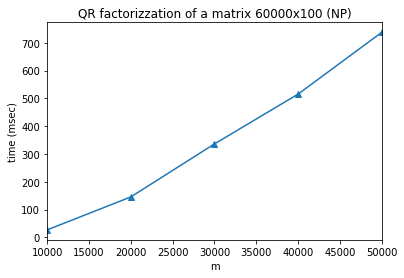

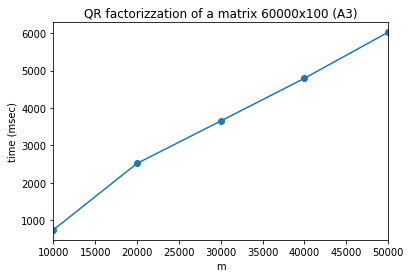

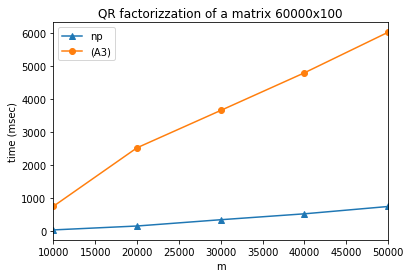

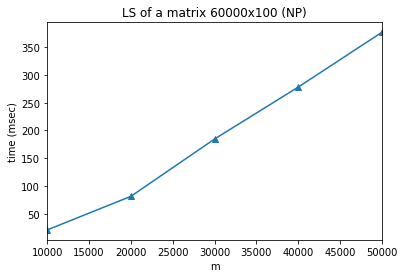

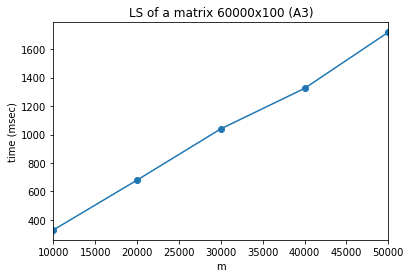

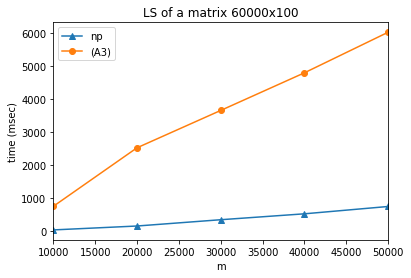

<Figure size 432x288 with 0 Axes>

In [8]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

# CUP test

In [9]:
cup = '../../data/ML-CUP20-TR.csv'

In [10]:
M, M_test, b, b_test = load_CUP(cup, split=0)
res, resnp = generic_test(M, b, 'CUP')
print(f"MSE A3: {mean_squared_error(np.matmul(M, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(M, resnp),b)}\n\n")


A,b = generate(5000,50)
res, resnp = generic_test(A, b, 'RANDOM')
print(f"MSE A3: {mean_squared_error(np.matmul(A, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(A, resnp),b)}")

---------- CUP DATASET ----------
Solved (m x n): (1524,10) in 2.23 msec, w/ np in 0.3 msec - Reverting and reconstruction: 3.14 msec, w/ np took: 0.321 msec
res error: 1.0537730959643323 - np_res error: 0.9962999753126452
QR error: 4.985905640396062e-16 - QR error w/ np: 3.2893174070752376e-16

MSE A3: 972.4632084924591
MSE np: 869.279035729481


---------- RANDOM DATASET ----------
Solved (m x n): (5000,50) in 43.766 msec, w/ np in 5.339 msec - Reverting and reconstruction: 139.157 msec, w/ np took: 4.957 msec
res error: 1.0051257949606285 - np_res error: 0.994796664107203
QR error: 7.736187730576775e-16 - QR error w/ np: 3.8651536202539743e-16

MSE A3: 0.4920606913668189
MSE np: 0.4819993757656366
